# World Population By Countries(2025)

# Data Collection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file = pd.read_csv(r"C:\Users\thara\Downloads\python\Wolrd Population Data.csv")
file

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,45,09,35,791",0.89%,"1,28,66,195",488,"29,73,190","-6,30,830",2.0,28,37%,17.78%
1,2,China,"1,41,93,21,278",-0.23%,"-32,63,655",151,"93,88,211","-3,18,992",1.0,40,66%,17.39%
2,3,United States,"34,54,26,571",0.57%,"19,49,236",38,"91,47,420","12,86,132",1.6,38,82%,4.23%
3,4,Indonesia,"28,34,87,931",0.82%,"22,97,864",156,"18,11,570","-38,469",2.1,30,59%,3.47%
4,5,Pakistan,"25,12,69,164",1.52%,"37,64,669",326,"7,70,880","-14,01,173",3.5,20,34%,3.08%
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70%,-31,44,100,-7,1.4,42,11%,0.00%
230,231,Falkland Islands,"3,470",-0.20%,-7,0,"12,170",-13,1.7,42,68%,0.00%
231,232,Tokelau,"2,506",4.55%,109,251,10,72,2.6,27,0%,0.00%
232,233,Niue,"1,819",0.11%,2,7,260,10,2.5,36,44%,0.00%


# Data Cleaning

In [4]:
file.duplicated()  #-----> #FALSE
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


In [26]:
cols_numeric = ['Population (2024)','Net Change','Density (P/Km²)','Land Area (Km²)','Migrants (net)']
for col in cols_numeric:
    file[col] = (file[col].astype(str).str.replace(',', '', regex=False).astype(int))
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    int64  
 3   Yearly Change      234 non-null    float64
 4   Net Change         234 non-null    int64  
 5   Density (P/Km²)    234 non-null    int64  
 6   Land Area (Km²)    234 non-null    int64  
 7   Migrants (net)     234 non-null    int64  
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        216 non-null    float64
 11  World Share        234 non-null    float64
dtypes: float64(4), int64(7), object(1)
memory usage: 22.1+ KB


In [27]:
cols_percent = ['Yearly Change', 'Urban Pop %', 'World Share']
for col in cols_percent:
    file[col] = pd.to_numeric(file[col].astype(str).str.replace('%', '').str.replace(',', ''),errors='coerce')
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    int64  
 3   Yearly Change      234 non-null    float64
 4   Net Change         234 non-null    int64  
 5   Density (P/Km²)    234 non-null    int64  
 6   Land Area (Km²)    234 non-null    int64  
 7   Migrants (net)     234 non-null    int64  
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        216 non-null    float64
 11  World Share        234 non-null    float64
dtypes: float64(4), int64(7), object(1)
memory usage: 22.1+ KB


In [28]:
file.head(234)

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1450935791,0.89,12866195,488,2973190,-630830,2.0,28,37.0,17.78
1,2,China,1419321278,-0.23,-3263655,151,9388211,-318992,1.0,40,66.0,17.39
2,3,United States,345426571,0.57,1949236,38,9147420,1286132,1.6,38,82.0,4.23
3,4,Indonesia,283487931,0.82,2297864,156,1811570,-38469,2.1,30,59.0,3.47
4,5,Pakistan,251269164,1.52,3764669,326,770880,-1401173,3.5,20,34.0,3.08
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,4389,-0.70,-31,44,100,-7,1.4,42,11.0,0.00
230,231,Falkland Islands,3470,-0.20,-7,0,12170,-13,1.7,42,68.0,0.00
231,232,Tokelau,2506,4.55,109,251,10,72,2.6,27,0.0,0.00
232,233,Niue,1819,0.11,2,7,260,10,2.5,36,44.0,0.00


# Exploratory Data Analysis

In [29]:
# TOP 10 MOST POPULATED COUNTRIES:
top10 = file[['Country','Population (2024)']].sort_values(by='Population (2024)',ascending = False).head(10)
top10

,Country,Population (2024)
0,India,1450935791
1,China,1419321278
2,United States,345426571
3,Indonesia,283487931
4,Pakistan,251269164
5,Nigeria,232679478
6,Brazil,211998573
7,Bangladesh,173562364
8,Russia,144820423
9,Ethiopia,132059767


In [12]:
# TOP 10 COUNTRIES BY YEARLY GROWTH:
top10_growth = file[['Country','Yearly Change']].sort_values(by='Yearly Change',ascending = False).head(10).reset_index(drop=True)
top10_growth

,Country,Yearly Change
0,Chad,5.07
1,Oman,4.60
2,Syria,4.57
3,Tokelau,4.55
4,South Sudan,4.01
5,United Arab Emirates,3.62
6,Somalia,3.54
7,Central African Republic,3.46
8,Niger,3.34
9,Mayotte,3.32


In [13]:
# TOP 10 COUNTRIES BY NET CHANGE: 
top10_net = file[['Country','Net Change']].sort_values(by='Net Change',ascending = False).head(10).reset_index(drop=True)
top10_net

,Country,Net Change
0,Dominican Republic,"96,292"
1,Kuwait,"95,725"
2,Nicaragua,"92,527"
3,Mozambique,"9,96,606"
4,Chad,"9,80,059"
5,Iraq,"9,67,966"
6,Iran,"9,59,031"
7,Philippines,"9,52,471"
8,State of Palestine,"86,241"
9,Gibraltar,858


In [14]:
# TOP 10 COUNTIRES BY DENSITY: 
top_density = file[['Country','Density (P/Km²)']].sort_values(by='Density (P/Km²)',ascending = False).head(10).reset_index(drop=True)
top_density

,Country,Density (P/Km²)
0,Kenya,99
1,Honduras,97
2,Northern Mariana Islands,96
3,Spain,96
4,Senegal,96
5,Caribbean Netherlands,94
6,Timor-Leste,94
7,Moldova,92
8,State of Palestine,913
9,Russia,9


# Data Visualization

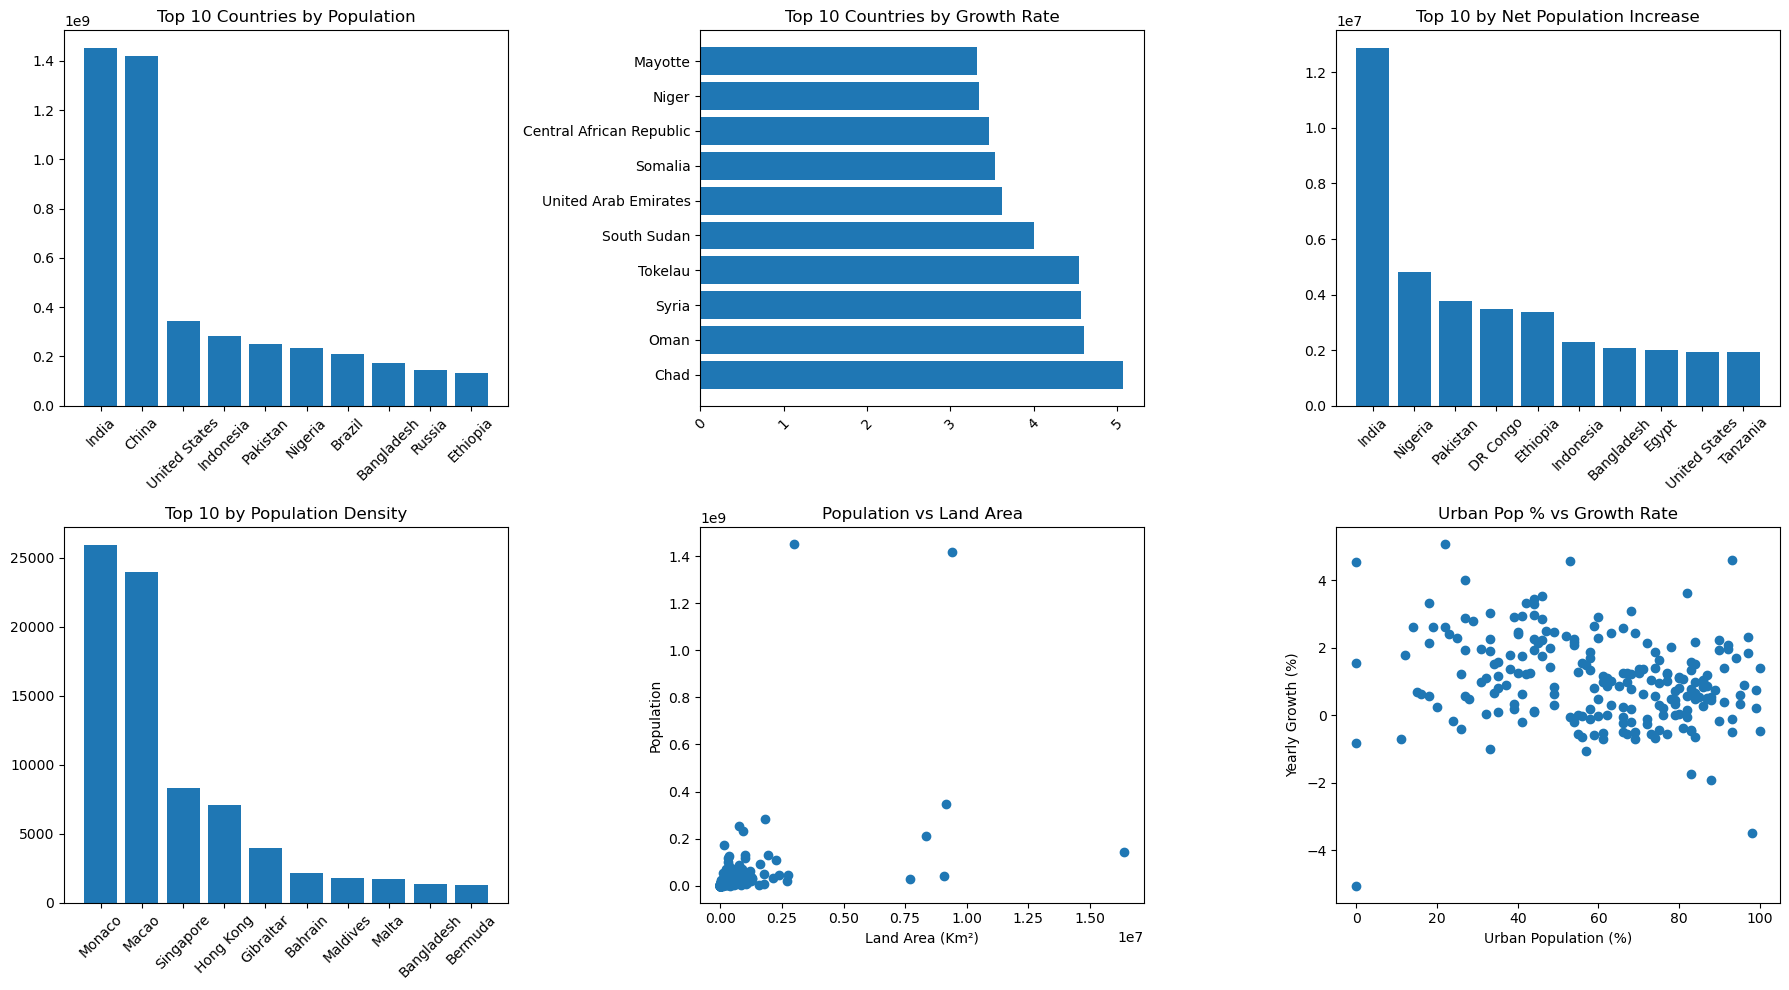

In [30]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,3,figsize=(18,10))
axes = axes.flatten()

#Top 10 most populated countries:
top10 = file.sort_values('Population (2024)', ascending=False).head(10)
axes[0].bar(top10['Country'],top10['Population (2024)'])
axes[0].set_title('Top 10 Countries by Population')
axes[0].tick_params(axis ='x',rotation=45)

#Top 10 Countries by Yearly Growth:
top10_growth = file.sort_values('Yearly Change', ascending=False).head(10)
axes[1].barh(top10_growth['Country'], top10_growth['Yearly Change'])
axes[1].set_title('Top 10 Countries by Growth Rate')
axes[1].tick_params(axis='x', rotation=45)

#Top 10 Countries by Net Change
top10_net = file.sort_values('Net Change', ascending=False).head(10)
axes[2].bar(top10_net['Country'], top10_net['Net Change'])
axes[2].set_title('Top 10 by Net Population Increase')
axes[2].tick_params(axis='x', rotation=45)

#Top 10 Countries by Density
top_density = file.sort_values('Density (P/Km²)', ascending=False).head(10)
axes[3].bar(top_density['Country'], top_density['Density (P/Km²)'])
axes[3].set_title('Top 10 by Population Density')
axes[3].tick_params(axis='x', rotation=45)

#Population vs Land Area
axes[4].scatter(file['Land Area (Km²)'], file['Population (2024)'])
axes[4].set_title('Population vs Land Area')
axes[4].set_xlabel('Land Area (Km²)')
axes[4].set_ylabel('Population')

#Urban Pop % vs Yearly Growth
axes[5].scatter(file['Urban Pop %'], file['Yearly Change'])
axes[5].set_title('Urban Pop % vs Growth Rate')
axes[5].set_xlabel('Urban Population (%)')
axes[5].set_ylabel('Yearly Growth (%)')

plt.tight_layout()
plt.show()

# Findings

# Insights